In [1]:
from sentence_transformers import SentenceTransformer
import torch
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
device = "cuda" if torch.cuda.is_available() else "cpu"
model = SentenceTransformer("all-mpnet-base-v2", device=device)
import json


model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

In [ ]:
device

## 1. Books attributes embeddings

In [3]:
# load the all atributes data dict
with open('../data/books/augmented_items_attributes_dict.json', 'r') as f:
    all_attributes = json.load(f)
print("Number of books: ", len(all_attributes))

Number of books:  33962


In [4]:
# create a list of sentences from the attributes of the books and encode them with the model
import re
pattern = r'[,\|]'
sentences = []
for book_id in all_attributes.keys() :
    sentence = ""
    for key in all_attributes[book_id]:
        element = re.sub(pattern, '', all_attributes[book_id][key]) 
        sentence += element + ","
    sentences.append(sentence)
# encode the sentences
embeddings = model.encode(sentences)

# store the embeddings in the dataframe
embeddings = pd.DataFrame(embeddings, index=all_attributes.keys(), columns=[f'{i}' for i in range(768)])
      

In [5]:
# store the embeddings to pickle file 
#embeddings.to_pickle('../data/books/books_attributes_embeddings.pkl')
embeddings

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,0.029659,0.027084,-0.005097,0.046821,-0.017934,0.000363,0.007214,0.042555,-0.008249,-0.010049,...,-0.040929,-0.024552,0.054967,-0.026744,-0.026424,-0.042370,-0.026507,-0.019472,0.022489,-0.041302
1,0.026816,-0.004523,0.018178,-0.021621,-0.031738,-0.000187,-0.007370,-0.024579,-0.010693,-0.001632,...,-0.067000,-0.036693,0.027231,-0.024272,0.004710,0.041053,-0.016904,0.005036,-0.023318,-0.034237
2,-0.005242,0.051001,0.008258,-0.026334,-0.024731,0.014584,0.012722,0.007938,0.034905,0.020589,...,-0.067107,0.009518,0.011535,-0.018670,-0.001715,-0.031302,-0.023123,0.015056,0.021357,-0.037941
3,0.014817,0.028729,0.021543,-0.014347,0.005235,0.013447,0.001538,0.029886,0.063321,0.000301,...,0.001723,-0.023030,-0.008398,-0.030066,-0.001609,-0.008462,-0.007094,0.020429,-0.006779,-0.052378
4,0.021323,0.008237,0.004853,0.007941,-0.080532,-0.027559,0.019641,-0.015903,-0.010007,0.021147,...,-0.049354,-0.036294,0.008294,-0.018764,0.015072,-0.039995,-0.005197,0.011643,0.001275,-0.025199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33957,0.004568,0.025030,0.009946,0.001743,-0.047856,0.015450,-0.000534,0.001957,0.041805,0.025917,...,-0.070447,-0.032757,0.031838,0.017576,0.004192,0.007422,-0.006397,0.024451,-0.018519,-0.032704
33958,0.022578,0.005457,-0.000515,-0.012772,-0.022495,0.022063,-0.009930,-0.012650,-0.017179,0.008541,...,-0.084793,0.000907,0.020149,0.023763,0.008768,0.102174,-0.016413,0.025555,0.001892,-0.026771
33959,0.017687,0.013659,-0.002275,-0.010372,0.031696,0.009698,-0.013733,0.028609,0.017904,0.015837,...,-0.008909,0.009803,0.041455,-0.010276,-0.064840,0.000462,-0.006917,0.010908,0.009375,-0.058420
33960,0.051713,0.030801,0.004460,-0.016251,-0.022884,0.009632,0.010382,-0.024761,-0.039520,-0.047849,...,-0.059657,-0.045378,0.056200,-0.030953,-0.018637,0.037256,0.028055,0.048477,0.019730,-0.017958


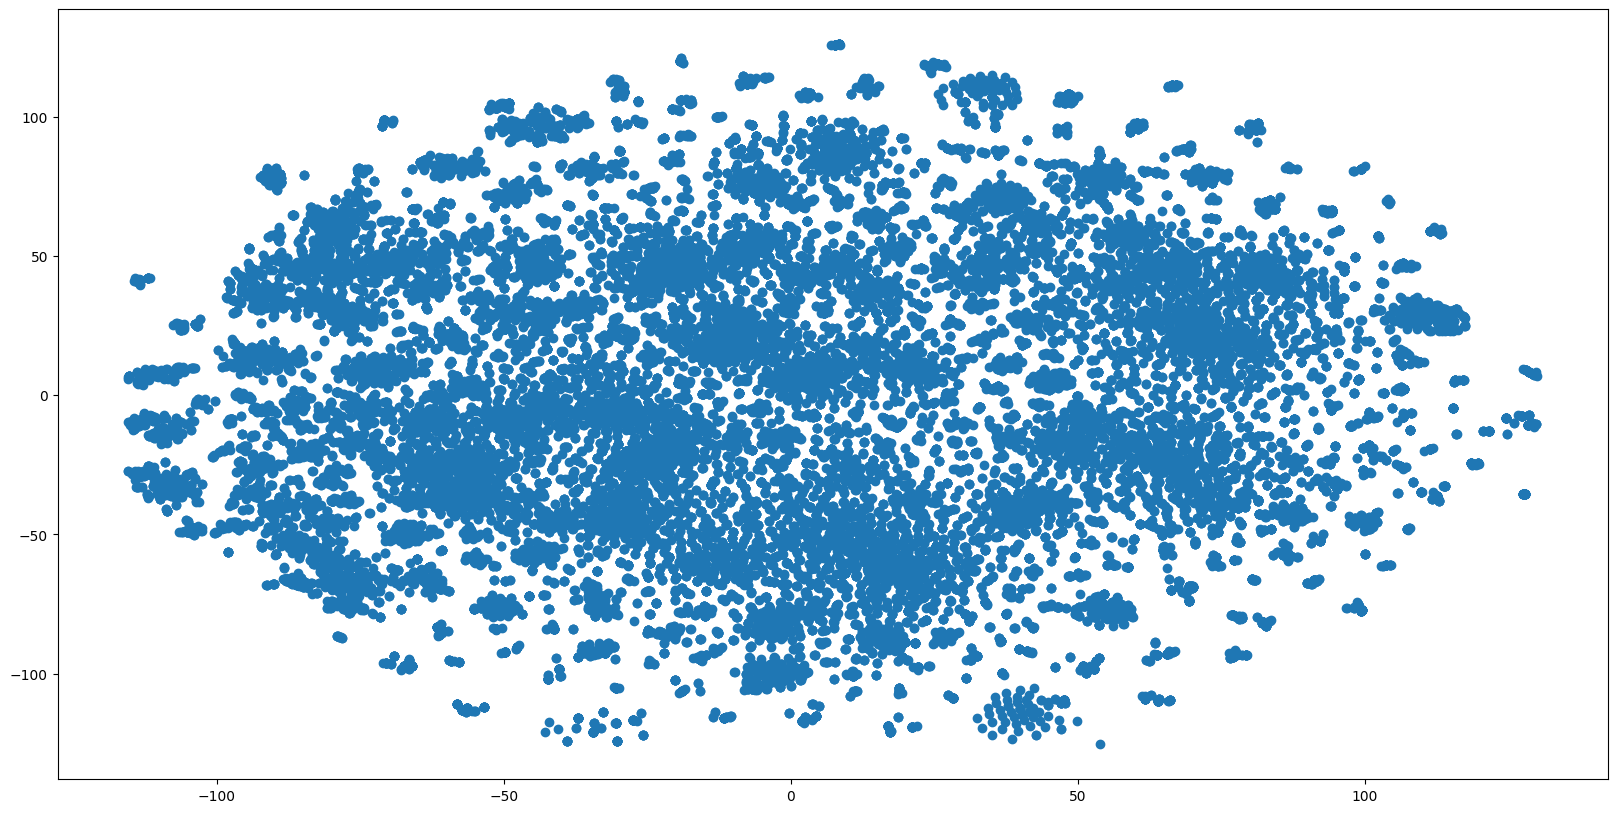

In [45]:
# reduce the dimensionality of the embeddings to 2 dimensions with t-SNE
tsne = TSNE(n_components=2)
tsne_embeddings = tsne.fit_transform(embeddings)
# plot the embeddings
plt.figure(figsize=(20,10))
plt.scatter(tsne_embeddings[:,0], tsne_embeddings[:,1])
plt.show()

## 2. Users profiles embeddings

In [7]:
# load user profiles data 
user_profiles = pd.read_csv('../data/books/augmented_users_profiles.csv',sep=";")
user_profiles.head()

,age,gender,liked_genre,disliked_genre,liked_authors,country,language
0,35,female,Fiction,Non-fiction,"Anita Diamant, Lilian Jackson Braun",Canada,English
1,35,female,"fantasy, science fiction, mystery, memoir, sho...",Epic Theatre,"Garth Nix, Shel Silverstein, David G. Hartwell...",USA,English
2,35,female,"Adventure, Science Fiction, Fantasy, Horror, M...",Romance,"Michael Crichton, J. K. Rowling, Stephen King,...",Ireland,English
3,35,female,"romance, adventure, fantasy, memoir",science fiction,"Jane Austen, Robert Louis Stevenson, Maya Ange...",United Kingdom,English
4,35,female,"romance, self-help, children's literature",Genetic engineering,"Marianne Williamson, Danielle Steel, Philip D....",United States,English


In [17]:
# create a list of sentences from the attributes of the users and encode them with the model
user_profiles_sentences = []
for user_id in user_profiles.index:
    sentence = ""
    for key in user_profiles.columns:
        element = user_profiles.loc[user_id, key]
        if not pd.isnull(element):
            sentence +=  str(element) + ". "
        else : 
            raise ValueError(f"User {user_id} has no value for {key}")
    user_profiles_sentences.append(sentence)
# test the function with the first user


In [21]:
# encode the sentences
user_profiles_embeddings = model.encode(sentences)
# save embeddings to pkl file
pd.DataFrame(user_profiles_embeddings).to_pickle('../data/books/users_profiles_embeddings.pkl')

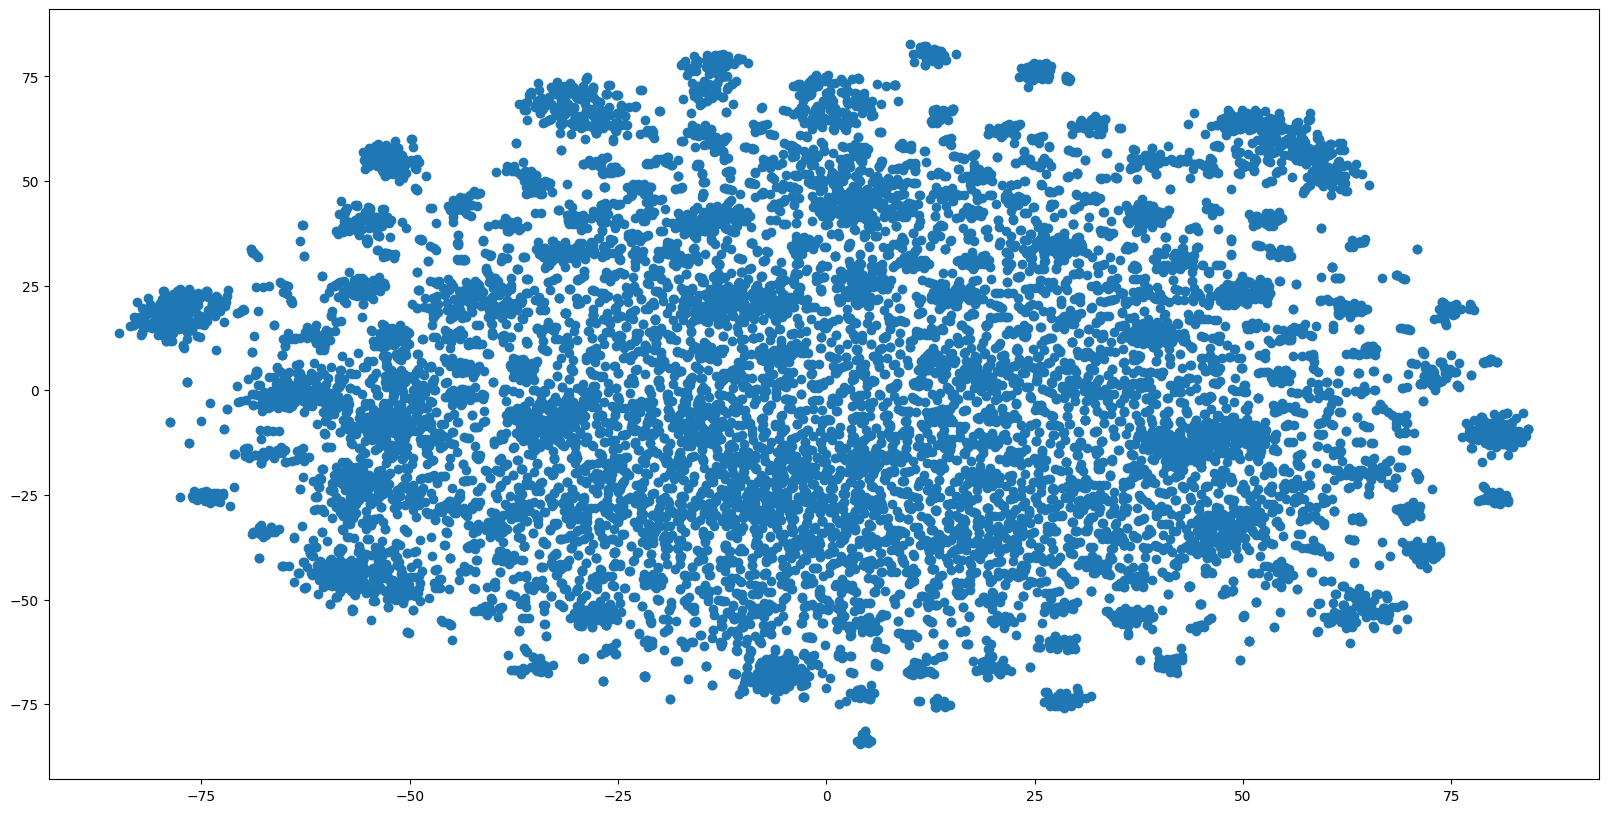

In [24]:
# reduce the dimensionality of the embeddings to 2 dimensions with t-SNE
tsne = TSNE(n_components=2)
tsne_embeddings = tsne.fit_transform(user_profiles_embeddings)
# plot the embeddings
plt.figure(figsize=(20, 10))
plt.scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1])
plt.show()